In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import dateutil
import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Motor_Vehicle_Collisions_Crashes_NYPD.csv", low_memory = False)

In [3]:
data['CRASH DATETIME'] = data['CRASH DATE'] + " " +data['CRASH TIME']
data['CRASH DATETIME'] = pd.to_datetime(data['CRASH DATETIME'], format = '%m/%d/%Y %H:%M')
data['hour'] = pd.DatetimeIndex(data['CRASH DATETIME']).hour
data['year'] = pd.DatetimeIndex(data['CRASH DATETIME']).year
data['month'] = pd.DatetimeIndex(data['CRASH DATETIME']).month
data['season'] = (data['month']%12 + 3)//3
seasons = {1: '1 Winter', 2: '2 Spring', 3: '3 Summer', 4: '4 Autumn'} 
data['season_name'] = data['season'].map(seasons)
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH DATETIME,hour,year,month,season,season_name
0,02/02/2021,0:00,NaN,NaN,NaN,NaN,NaN,NEW ENGLAND THRUWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-02-02 00:00:00,0,2021,2,1,1 Winter
1,02/01/2021,0:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Sedan,NaN,NaN,NaN,2021-02-01 00:15:00,0,2021,2,1,1 Winter
2,02/01/2021,15:30,NaN,NaN,40.697815,-73.7602,"(40.697815, -73.7602)",114 ROAD,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-02-01 15:30:00,15,2021,2,1,1 Winter
3,02/01/2021,2:35,NaN,NaN,NaN,NaN,NaN,PROSPECT EXPRESSWAY RAMP,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-02-01 02:35:00,2,2021,2,1,1 Winter
4,10/27/2020,9:00,NaN,NaN,NaN,NaN,NaN,BRUCKNER EXPRESSWAY,NaN,NaN,...,Sedan,NaN,NaN,NaN,2020-10-27 09:00:00,9,2020,10,4,4 Autumn


In [4]:
df1 = data.groupby(['season_name', 'hour']).size().reset_index(name = 'Counts')
df1

,season_name,hour,Counts
0,1 Winter,0,12010
1,1 Winter,1,6644
2,1 Winter,2,5135
3,1 Winter,3,4628
4,1 Winter,4,5436
5,1 Winter,5,6072
6,1 Winter,6,9982
7,1 Winter,7,12729
8,1 Winter,8,25000
9,1 Winter,9,23612


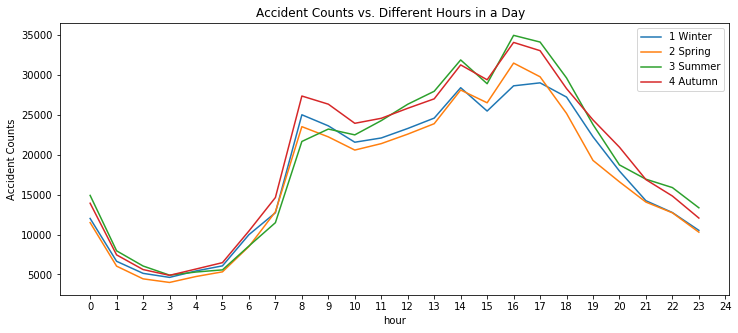

In [5]:
fig, ax = plt.subplots(figsize = (12,5))
for season in ['1 Winter', '2 Spring', '3 Summer', '4 Autumn']:
    ax.plot(df1[df1['season_name']==season].hour, df1[df1['season_name']==season].Counts, label=season)
ax.set_xlabel("hour")
ax.xaxis.set_ticks(np.arange(0, 25, 1))
ax.set_ylabel("Accident Counts")
ax.legend(loc='best')
ax.title.set_text("Accident Counts vs. Different Hours in a Day  ")
plt.show()

In [6]:
df2 = data
df2['Casualty'] = np.where(df2['NUMBER OF PERSONS INJURED']+df2['NUMBER OF PERSONS KILLED']>0, True, False)
df2 = df2.groupby(['hour', 'Casualty']).size().reset_index(name = 'Counts')
df2['ratio'] = df2['Counts']/df2.groupby('hour')['Counts'].transform('sum')
df2 = df2[df2['Casualty'] == True]
df2

,hour,Casualty,Counts,ratio
1,0,True,11569,0.221112
3,1,True,6390,0.227548
5,2,True,5042,0.237338
7,3,True,4586,0.248996
9,4,True,5436,0.256997
11,5,True,5758,0.245648
13,6,True,8472,0.225992
15,7,True,10977,0.212366
17,8,True,17799,0.182518
19,9,True,15614,0.163700


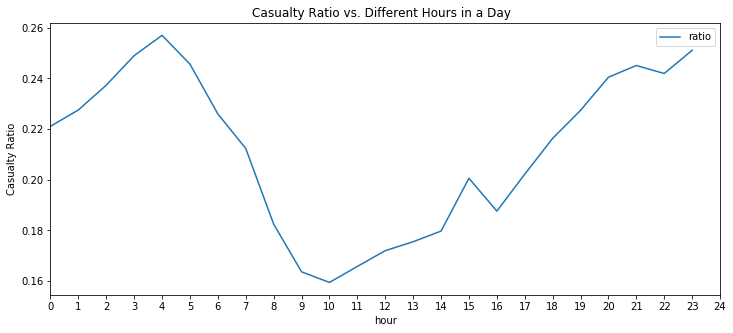

In [7]:
line = df2.plot.line(x = 'hour', y = 'ratio', figsize = (12,5), rot = 0, legend =False)
line.set_xlabel("hour")
line.xaxis.set_ticks(np.arange(0, 25, 1))
line.set_ylabel("Casualty Ratio")
line.legend(loc='best')
line.title.set_text("Casualty Ratio vs. Different Hours in a Day  ")
plt.show()

In [8]:
df3 = data
df3['Casualty'] = np.where(df3['NUMBER OF PERSONS INJURED']+df3['NUMBER OF PERSONS KILLED']>0, True, False)
df3 = df3.groupby(['season_name','hour', 'Casualty']).size().reset_index(name = 'Counts')
df3['ratio'] = df3['Counts']/df3.groupby(['season_name','hour'])['Counts'].transform('sum')
df3 = df3[df3['Casualty'] == True]
df3

,season_name,hour,Casualty,Counts,ratio
1,1 Winter,0,True,2483,0.206744
3,1 Winter,1,True,1404,0.211318
5,1 Winter,2,True,1106,0.215385
7,1 Winter,3,True,1062,0.229473
9,1 Winter,4,True,1324,0.243561
11,1 Winter,5,True,1463,0.240942
13,1 Winter,6,True,2381,0.238529
15,1 Winter,7,True,2621,0.205908
17,1 Winter,8,True,4306,0.172240
19,1 Winter,9,True,3538,0.149839


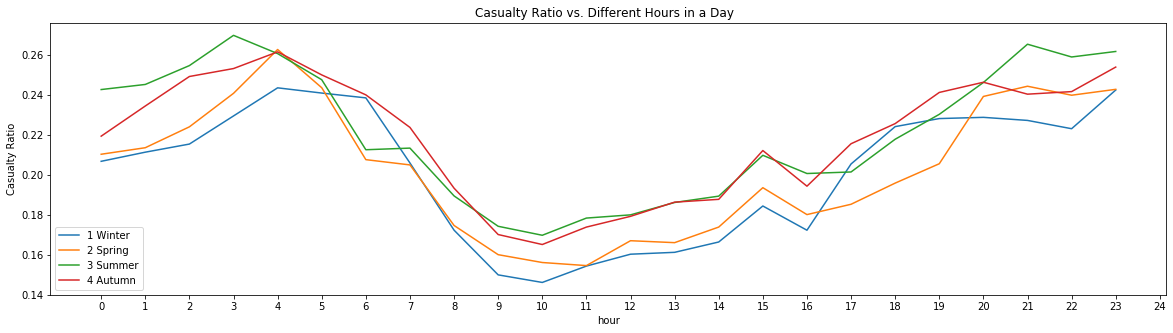

In [9]:
fig, ax2 = plt.subplots(figsize = (20,5))
for season in ['1 Winter', '2 Spring', '3 Summer', '4 Autumn']:
    ax2.plot(df3[df3['season_name']==season].hour, df3[df3['season_name']==season].ratio, label=season)
ax2.set_xlabel("hour")
ax2.xaxis.set_ticks(np.arange(0, 25, 1))
ax2.set_ylabel("Casualty Ratio")
ax2.legend(loc='best')
ax2.title.set_text("Casualty Ratio vs. Different Hours in a Day  ")
plt.show()